In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

 In recall model plot the dependency of the number of recalled words on the number of presented words for 2 sparsity levels  and  compare curves with theoretical prediction. 


##Function for the 1rst Model (Sparsity = 0.2)

In [ ]:
def recallSymM(L):
  f = 0.2
  N = 1e5
  chunk = 1e3

  nn = (int(chunk), int((N+chunk-1)//chunk))

  M= np.zeros((L,L))
  for _ in range (nn[1]):
    xi= np.array(np.random.rand(nn[0],L) < f,dtype=int)
    M+= xi.T.dot(xi)

  Nw= np.empty(L)
  Nw[:]= np.diag(M)
  M-= np.diag(Nw)*100
  rec= np.empty(2*L,dtype=int)
  line= np.empty((L,))
  prev= np.random.randint(L)
  rec[0]=prev
  curr= np.argmax(M[prev,:])
  rec[1]=curr
  for k in range(2,2*L):
    line[:]=M[curr,:]
    line[prev]=-100
    prev=curr
    curr=np.argmax(line)
    rec[k]=curr
  _, uIdx= np.unique(rec,return_index= True)
  uRecall= rec[np.sort(uIdx)]
  return uRecall, rec

##Function for the 2nd Model (Sparsity = 0.01)

In [ ]:
def recallSymM2(L):
  f = 0.01
  N = 1e5
  chunk = 1e3

  nn = (int(chunk), int((N+chunk-1)//chunk))

  M= np.zeros((L,L))
  for _ in range (nn[1]):
    xi= np.array(np.random.rand(nn[0],L) < f,dtype=int)
    M+= xi.T.dot(xi)

  Nw= np.empty(L)
  Nw[:]= np.diag(M)
  M-= np.diag(Nw)*100
  rec= np.empty(2*L,dtype=int)
  line= np.empty((L,))
  prev= np.random.randint(L)
  rec[0]=prev
  curr= np.argmax(M[prev,:])
  rec[1]=curr
  for k in range(2,2*L):
    line[:]=M[curr,:]
    line[prev]=-100
    prev=curr
    curr=np.argmax(line)
    rec[k]=curr
  _, uIdx= np.unique(rec,return_index= True)
  uRecall= rec[np.sort(uIdx)]
  return uRecall, rec

#### For the 1rst model, we get how much words are remembered on average

In [ ]:
rc= np.empty((6,))
#List of numbers of words
Ls=[10,20,40,60,80,100]
for kk in range (len(Ls)):
  L=Ls[kk]
  rec= np.empty((1000,))
  for k in range (len(rec)):
    rr = recallSymM(L)
    rec[k] =  len(rr[0])
  rc[kk]= rec.mean()

#### For the 2nd model, we get how much words are remembered on average

In [ ]:
rc2= np.empty((6,))
Ls=[10,20,40,60,80,100]
for kk in range (len(Ls)):
  L=Ls[kk]
  rec= np.empty((1000,))
  for k in range (len(rec)):
    rr = recallSymM2(L)
    rec[k] =  len(rr[0])
  rc2[kk]= rec.mean()

## Results

[ 5.511  7.351  9.339 10.737 11.495 12.884]
[ 6.284  9.103 13.148 15.43  18.027 19.421]
[ 6.64078309  9.39148551 13.28156617 16.26653005 18.78297101 21.        ]
ERROR! Session/line number was not unique in database. History logging moved to new session 59


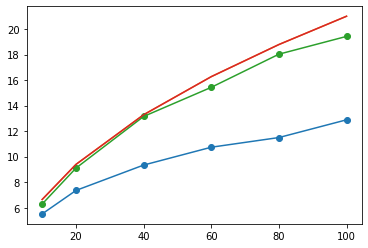

In [ ]:
#Results for 1rst model
print(rc)
#results for second model
print(rc2)
#theretical results
print(2.1*np.sqrt(np.array(Ls)))

plt.plot(Ls,rc,'-o',Ls,2.1*np.sqrt(np.array(Ls)))
plt.plot(Ls,rc2,'-o',Ls,2.1*np.sqrt(np.array(Ls)))